In [160]:
import matplotlib.pyplot as plt

from read_data import *
from changepoint_detection import *
from eigen_freq import *

matplotlib.rcParams["font.family"] = "Times New Roman"
matplotlib.rcParams.update({'font.size': 16})

In [161]:
data = process_data()

In [3]:
selected_sensors = ["CH1_Moment", "CH2_Kraft"]
cpts = generate_changepoints(data, selected_sensors)

c:\Users\Raafe\AppData\Local\Programs\Python\Python38\lib\site-packages\ruptures\costs\costnormal.py:27: UserWarning: New behaviour in v1.1.5: a small bias is added to the covariance matrix to cope with truly constant segments (see PR#198).
  warnings.warn(


In [140]:
experiments = [
            'V2_00001',
            'V6_00001',
            'V10_0001',
            'V17_0001',
            'V20_0001',
            'V24_0001',
            'V25a_001',
        ]

In [164]:
def plot_alerts(datasets, data, sensor, cpts, cpt_pos, figsize, fig_name):
    fig, ax = plt.subplots(nrows=len(datasets), ncols=2, figsize=figsize)
    fig.tight_layout(h_pad=2, w_pad=4)
    points = 20000
    for i in range(len(datasets)):
        dataset = datasets[i]
        cpt = cpt_pos[dataset]
        cpt -=1
        cpt_indexes = cpts[dataset][sensor]['indexes']
        vibrations_bf = data[dataset]['dat'][sensor].loc[:cpt_indexes[cpt]][-points:]
        vibrations_af = data[dataset]['dat'][sensor].loc[cpt_indexes[cpt]:][0:points]
        time_bf = data[dataset]['dat']['time'].loc[:cpt_indexes[cpt]][-points:]
        time_af = data[dataset]['dat']['time'].loc[cpt_indexes[cpt]:][0:points]

        data_bf_af = np.concatenate((vibrations_bf.values.reshape(-1), vibrations_af.values.reshape(-1)))
        time_bf_af = np.concatenate((time_bf.values.reshape(-1), time_af.values.reshape(-1)))

        df = pd.DataFrame({'time': time_bf_af, 'vibrations': data_bf_af})
        window_size = 10000
        values = df['vibrations']
        t = df['time']

        rolling_var = values.rolling(window_size).std()

        spec = ax[i,0].specgram(data_bf_af, Fs=20000, NFFT=128, noverlap=64)

        labels = [item.get_text() for item in ax[i,0].get_xticklabels()]
        new_ticks = [str(round(t.iloc[0] + float(label), 1)) for label in labels]
        ax[i, 0].set_xticklabels(new_ticks)
        
        ax[i, 0].set_xlabel('Time (s)')
        ax[i, 0].set_ylabel('Frequency (Hz)')

        # Add a color bar legend
        cbar = plt.colorbar(spec[3], ax=ax[i,0])
        cbar.set_label('PSD')

        if i == 0:
            ax[0,0].set_title("Spectrogram")
            ax[0,1].set_title("Rolling Std")
        else:
            ax[i,0].set_title("")
            ax[i,1].set_title("")

        ax[i, 1].plot(t, rolling_var, label=f'Rolling Std (window size={window_size})')
        ax[i,1].set_ylabel('Rolling std')
        ax[i,1].set_xlabel('Time (s)')
    
    for i, ax_row in enumerate(ax):
        # Add the row title to the left of the first subplot in the row
        ax_row[0].text(-0.5, 0.5, datasets[i], rotation=90,
                    va='center', ha='center', transform=ax_row[0].transAxes)

    plt.savefig(os.path.join("Figures",  fig_name), dpi=180, bbox_inches='tight')
    plt.show()

C:\Users\Raafe\AppData\Local\Temp\ipykernel_34900\617688156.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i, 0].set_xticklabels(new_ticks)


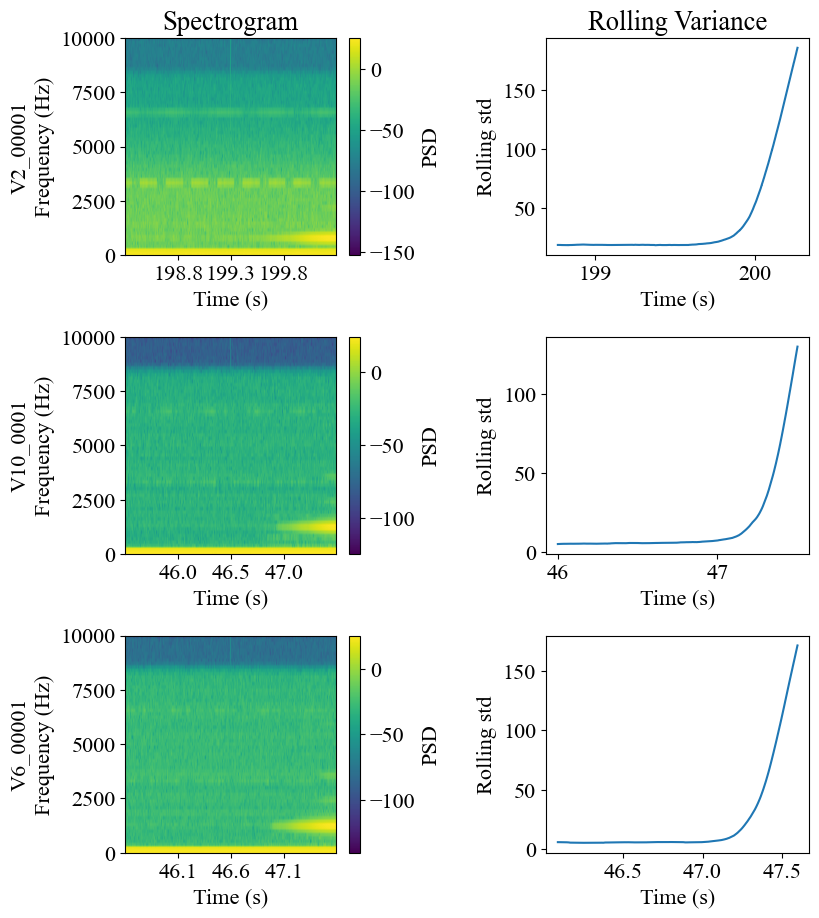

In [180]:
cpt_pos = {
 'V2_00001':3,
 'V10_0001':3,
 'V6_00001':3,
#  'V17_0001':3,
#  'V20_0001':3,
#  'V24_0001':3,
#  'V25a_001':3
}
plot_alerts(list(cpt_pos.keys()), data, "CH1_Moment", cpts, cpt_pos, (8, 9), "spec_var_ch1_1.pdf")

C:\Users\Raafe\AppData\Local\Temp\ipykernel_34900\617688156.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i, 0].set_xticklabels(new_ticks)


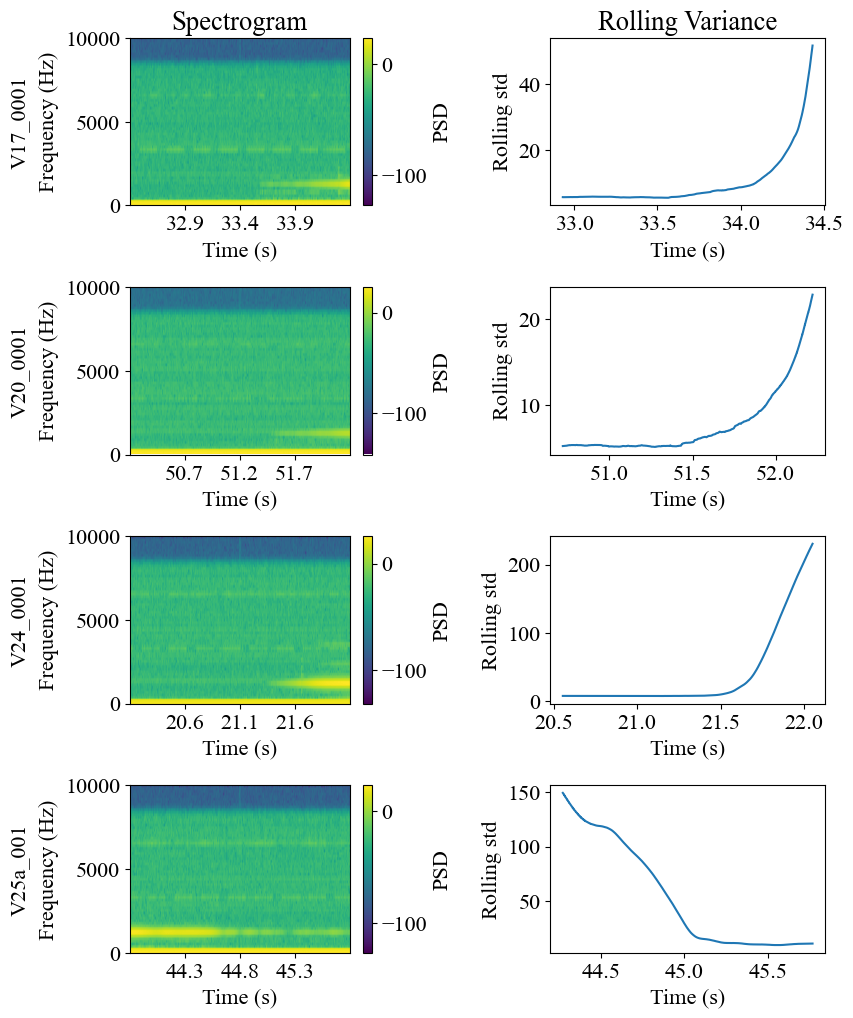

In [181]:
cpt_pos = {
#  'V2_00001':3,
#  'V10_0001':3,
#  'V6_00001':3,
 'V17_0001':3,
 'V20_0001':3,
 'V24_0001':3,
 'V25a_001':3
}
plot_alerts(list(cpt_pos.keys()), data, "CH1_Moment", cpts, cpt_pos, (8, 10), "spec_var_ch1_2.pdf")

In [ ]:
selected_datasets = {
 'V2_00001':3,
 'V10_0001':3,
 'V6_00001':3,
 'V17_0001':3,
 'V20_0001':3,
 'V24_0001':3,
 'V25a_001':3
}

sensor = "CH2_Kraft"

for key in selected_datasets:
    c = selected_datasets[key]-1
    cpts = changepoints[key][sensor]["change_points"]
    indexes = changepoints[key][sensor]["indexes"]
    print(key, round(cpts[indexes[c]], 2))

V2_00001 291.5
V10_0001 47.53
V6_00001 47.63
V17_0001 41.79
V20_0001 52.38
V24_0001 22.1
V25a_001 118.32


In [170]:
values_dict = [
    {
        "dataset":"V2_00001",
        "t_spec": 199.4,
        "t_var": 200
    },
    {
        "dataset":"V6_00001",
        "t_var": 46.9,
        "t_spec": 47.3 
    },
    {
        "dataset":"V10_0001",
        "t_spec": 47.0,
        "t_var": 47.2
    },
    {
        "dataset":"V17_0001",
        "t_var": 34.2,
        "t_spec": 33.5
    },
    {
        "dataset":"V20_0001",
        "t_spec": 51.5,
        "t_var": 51.7
    },
    {
        "dataset":"V24_0001",
        "t_spec": 21.3,
        "t_var": 21.7
    },
    {
        "dataset":"V25a_001",
        "t_spec": 44.0,
        "t_var": 44.0
    }
]

In [171]:
print(pd.DataFrame(values_dict).to_latex())

\begin{tabular}{llrr}
\toprule
 & dataset & t_spec & t_var \\
\midrule
0 & V2_00001 & 199.400000 & 200.000000 \\
1 & V6_00001 & 47.300000 & 46.900000 \\
2 & V10_0001 & 47.000000 & 47.200000 \\
3 & V17_0001 & 33.500000 & 34.200000 \\
4 & V20_0001 & 51.500000 & 51.700000 \\
5 & V24_0001 & 21.300000 & 21.700000 \\
6 & V25a_001 & 44.000000 & 44.000000 \\
\bottomrule
\end{tabular}

